In [1]:
import matplotlib.pyplot as plt
from Bio.PDB.MMCIFParser import MMCIFParser

parser = MMCIFParser()
structure = parser.get_structure('2dn1', 'PROT/2dn1-assembly1.cif')

/home/agustin/.local/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4344.
  warnings.warn(
/home/agustin/.local/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4403.
  warnings.warn(
/home/agustin/.local/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain A-2 is discontinuous at line 4448.
  warnings.warn(
/home/agustin/.local/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain B-2 is discontinuous at line 4507.
  warnings.warn(
/home/agustin/.local/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4552.
  warnings.warn(
/home/agustin/.local/lib/python3.10/site-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain B is discontin

### Proteina

("estructura", Modelo, "cadena", (residuo))
Estructura es un String con: structure_id
Modelo es un entero empezando en 0
Cadena, las cadenas A, B, C etc


In [2]:
model = structure[0]
chain = model['A']
residue = chain[100]

```
residue.get_resname()    # returns the residue name, e.g. "ASN"
residue.is_disordered()  # returns 1 if the residue has disordered atoms
residue.get_segid()      # returns the SEGID, e.g. "CHN1"
```


In [3]:
residue.get_resname()

'LEU'

### Atomo


In [4]:
atom = structure[0]["A"][100]["CA"]
print(atom.full_id)

('2dn1', 0, 'A', (' ', 100, ' '), ('CA', ' '))


In [5]:
def atom_info(a):
     print(f"Name:  {a.get_name()}")  # atom name (spaces stripped, e.g. "CA")
     print(f"ID:    {a.get_id()}")  # id (equals atom name)
     print(f"Coordinates:   {a.get_coord()}")  # atomic coordinates
     print(f"Coordinates as vector: {a.get_vector()}")  # atomic coordinates as Vector object
     print(f"Isotropic B Factor:    {a.get_bfactor()}")  # isotropic B factor
     print(f"Occupancy: {a.get_occupancy()}")  # occupancy
     print(f"Alternative location:  {a.get_altloc()}")  # alternative location specifier
     print(f"Std deviation of atomic parameters:    {a.get_sigatm()}")  # standard deviation of atomic parameters
     print(f"Std deviation of anisotropic B factor: {a.get_siguij()}")  # standard deviation of anisotropic B factor
     print(f"Anisotropic B factor:  {a.get_anisou()}")  # anisotropic B factor
     print(f"Atom full name:    {a.get_fullname()}")  # atom name (with spaces, e.g. ".CA.")
     
atom_info(atom)

Name:  CA
ID:    CA
Coordinates:   [29.126 28.904 10.83 ]
Coordinates as vector: <Vector 29.13, 28.90, 10.83>
Isotropic B Factor:    12.76
Occupancy: 1.0
Alternative location:   
Std deviation of atomic parameters:    None
Std deviation of anisotropic B factor: None
Anisotropic B factor:  [ 0.161  -0.0323  0.0212  0.1332 -0.0115  0.1907]
Atom full name:    CA


### Recorriendo estructura

In [6]:
import pandas as pd

complete_structure = []

chains = structure.get_chains()
for chain in chains:
    residues = chain.get_residues()
    for residue in residues:
        atoms = residue.get_atoms()
        for atom in atoms:
            complete_structure.append([chain, residue, atom])
columns = ["chain", "residue", "atom"]
df_structure = pd.DataFrame(complete_structure, columns=columns)

df_structure.head()


,chain,residue,atom
0,"((<Atom N>, <Atom CA>, <Atom C>, <Atom O>, <At...","(<Atom N>, <Atom CA>, <Atom C>, <Atom O>, <Ato...",<Atom N>
1,"((<Atom N>, <Atom CA>, <Atom C>, <Atom O>, <At...","(<Atom N>, <Atom CA>, <Atom C>, <Atom O>, <Ato...",<Atom CA>
2,"((<Atom N>, <Atom CA>, <Atom C>, <Atom O>, <At...","(<Atom N>, <Atom CA>, <Atom C>, <Atom O>, <Ato...",<Atom C>
3,"((<Atom N>, <Atom CA>, <Atom C>, <Atom O>, <At...","(<Atom N>, <Atom CA>, <Atom C>, <Atom O>, <Ato...",<Atom O>
4,"((<Atom N>, <Atom CA>, <Atom C>, <Atom O>, <At...","(<Atom N>, <Atom CA>, <Atom C>, <Atom O>, <Ato...",<Atom CB>


### Visualización

In [7]:
import py3Dmol

In [8]:
#Codigo de PDB que queremos visualizar
pdb='2dn1'
view=py3Dmol.view(query=f'pdb:{pdb}')
#Zoom a la estructura
view.zoomTo()
#Color de fondo
view.setBackgroundColor('white')
#Visualizamos la cadena A con el stylo de Cartoon en un color determinado
view.setStyle({'chain':'A'},{'cartoon': {'color':'purple'}})
view.setStyle({'chain':'B'},{'stick': {'color':'yellow'}})
view.setStyle({'chain':'C'},{'cartoon': {'color':'blue'}})
#Inicializamos el visualizador
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### Visualización específica

In [9]:
residuo = 1
aminoacido = 'ALA'
elem = 'Fe'

view.clear()
view=py3Dmol.view(query=f'pdb:{pdb}')
#Zoom a la estructura
view.zoomTo()
#Color de fondo
view.setBackgroundColor('white')
# Para ver una posicion especifica vamos con el comando RESI
view.addStyle({'chain':'A','resi':f"{residuo}"},{'stick':{'colorscheme':'purple'}})

# Para ver todos los aminoacidos Alanina  vamos con el comando RESN
view.addStyle({'chain':'B','resn':aminoacido},{'sphere':{'colorscheme':'greenCarbon'}})

# Para ver un Atomo especifico
view.setStyle({'elem': elem}, {'sphere': {'radius': 1, 'color': 'yellow'}})

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### Visualizacion estructura con labels

In [10]:
view.clear()

view=py3Dmol.view(query=f'pdb:{pdb}')

view.addLabel('alpha subunits', {'fontColor':'orange', 'backgroundColor':'lightgray'},
                {'chain': ['A','B']})
view.setStyle({'chain':['A','B']},{'cartoon': {'color': 'red'}}) # alpha subunits of hemoglobin


view.addLabel('beta subunits', {'fontColor':'blue', 'backgroundColor':'lightgray'},
                {'chain': ['C','D']})
view.setStyle({'chain':['C','D']},{'cartoon': {'color': 'blue'}}) # beta subunits of hemoglobin

view.setStyle({'resn': 'HEM'},{'sphere': {'colorscheme': 'greenCarbon'}})
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### Obtener distancias

Con la siguiente funcion es posible obtener las distancias de los atomos en la estructura de la proteína

In [41]:
import numpy as np
import pandas as pd

# Función para calcular la distancia entre dos átomos
def calculate_distance(atom1, atom2):
    coord1 = atom1.get_coord()
    coord2 = atom2.get_coord()
    # Se usa np.linalg.norm para calcular la distancia euclidiana entre coord1 y coord2. La distancia euclidiana entre dos puntos
    return np.linalg.norm(coord1 - coord2)

# Función para obtener las distancias entre átomos especificados
def obtain_distance(atoms, structure):
    # Diccionario para almacenar las distancias entre pares de átomos
    distances = {}
    found_atoms = []
    
    # Recorrer cada cadena en la estructura
    for chain in structure.get_chains():
        # Recorrer cada residuo en la cadena
        for residue in chain.get_residues():
            # Buscar los átomos especificados en el residuo
            for atom in residue.get_atoms():
                if atom.get_name() in atoms:
                    found_atoms.append((atom, residue.get_id(), chain.get_id()))
            
    # Calcular la distancia entre cada par de átomos encontrados
    for i in range(len(found_atoms)):
        atom1 = found_atoms[i][0]
        for j in range(0, len(found_atoms), i+1):
            atom2 = found_atoms[j][0]
            if(atom2.get_name()!=atom1.get_name()):
                dist = calculate_distance(atom1, atom2)
                residue1 = found_atoms[i][1][1]
                residue2 = found_atoms[j][1][1]
                if dist<=8 and (np.abs(residue1-residue2)>=4): # agregar salto de residuos +4
                    # Guardar la distancia en el diccionario con el nombre de los átomos y el residuo
                    distances[(atom1.get_name(), atom2.get_name(), residue1, residue2, 
                               found_atoms[i][2], found_atoms[j][2])] = dist

    data = list(distances.keys())
    dist = list(distances.values())
    columns = ['ATOM1','ATOM2','ATOM1_RESIDUE_ID', 'ATOM2_RESIDUE_ID', 'ATOM1_CHAIN_ID', 'ATOM2_CHAIN_ID']
    df_distances = pd.DataFrame(data, columns=columns)
    df_distances['DISTANCE'] = dist
    return df_distances

distances = obtain_distance(['CA','CB'], structure)
distances

,ATOM1,ATOM2,ATOM1_RESIDUE_ID,ATOM2_RESIDUE_ID,ATOM1_CHAIN_ID,ATOM2_CHAIN_ID,DISTANCE
0,CA,CB,2,6,A,A,4.271172
1,CA,CB,2,7,A,A,6.456403
2,CA,CB,2,73,A,A,7.655000
3,CA,CB,2,124,A,A,7.766718
4,CA,CB,2,127,A,A,5.797159
5,CA,CB,2,128,A,A,7.373601
6,CA,CB,2,131,A,A,6.873361
7,CB,CA,2,6,A,A,5.343513
8,CB,CA,2,7,A,A,5.515097
9,CB,CA,3,141,A,A-2,7.658355


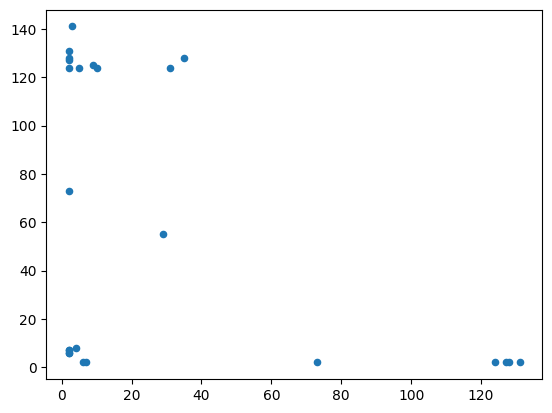

In [42]:
import matplotlib.pyplot as plt

plt.scatter(distances['ATOM1_RESIDUE_ID'], distances['ATOM2_RESIDUE_ID'], s=20)
plt.show()

### Visualización con lineas

In [147]:
view.clear()

view=py3Dmol.view(query=f'pdb:{pdb}')

# CONFIGURACION
#=========================
ATOM1='O'	
ATOM2='CA'
ATOM1_RESIDUE_ID=37	
ATOM2_RESIDUE_ID=92	
ATOM1_CHAIN_ID='B'	
ATOM2_CHAIN_ID='A-2'
#=========================

# Estilo general de la estructura (por ejemplo, un estilo cartoon)
view.setStyle({'stick': {'color':'skyblue'}})

# Seleccionar dos átomos específicos (por ejemplo, atomos de residuo 50 y 100)
# Ajusta 'resi' y 'atom' según tu estructura
atom1 = {'chain':ATOM1_CHAIN_ID,'resi': ATOM1_RESIDUE_ID, 'atom': ATOM1}
atom2 = {'chain':ATOM2_CHAIN_ID,'resi': ATOM2_RESIDUE_ID, 'atom': ATOM2}

# Añadir una línea entre los átomos para visualizar la distancia
view.addLine({'color':'red','linewidth': 1000,'start':atom1,'end':atom2})

view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### Visualización de superficie

In [56]:
view.clear()

view=py3Dmol.view(query=f'pdb:{pdb}')

heavychain = {'chain':'A'}
lightchain = {'chain':'B'}
antigen = {'chain':'C'}

view.setStyle(heavychain,{'cartoon':{'color':'blue'}})
view.setStyle(lightchain,{'cartoon':{'color':'red'}})
view.setStyle(antigen,{'sphere':{'colorscheme':'orangeCarbon'}})

view.addSurface(py3Dmol.SES,{'opacity':0.9,'color':'lightblue'}, heavychain) #Agrega la superficie a la cadena pesada
view.addSurface(py3Dmol.SES,{'opacity':0.9,'color':'pink'},lightchain) #Agrega la superficie a la cadena ligera
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.